# <center><font color="red"> https://bit.ly/ptpjb-2021-10</font>
# <center><font color="blue">10 - Time Series Analysis - Prophet</font>

<center><img alt="" src="images/cover_ptpjb_2021.png"/></center> 

## <center><font color="blue">tau-data Indonesia</font><br>(C) Taufik Sutanto - 2021</center>
<center><a href="https://tau-data.id">https://tau-data.id</a> ~ <a href="mailto:taufik@tau-data.id">taufik@tau-data.id</a></center>

# <center><font color="blue"> Analisis Data Time Series menggunakan Facebook Prophet

Data time series adalah data yang sering kita temui di kehidupan sehari-hari, contoh data time
series adalah:
1. Data saham, crypto, commodities.
2. Data sensor dari berbagai macam devices termasuk speeding camera.
3. Data penjualan, e-commerce, dan sebagainya.
Apa yang sering dilakukan pada data time series?
Jawaban paling umum adalah forecasting/prediksi. Misalnya, harga saham, jumlah penjualan
barang, dan sebagainya.
Algoritma yang umum dipakai untuk forecasting data time series:
1. ARIMA
2. ARCH
3. Regressive models
4. Neural networks LSTM

Apa itu Facebook Prophet?
Di kembangkan oleh Facebook Research, pada awalnya algoritma ini dibuat untuk
menghasilkan prediksi dengan kualitas tinggi untuk business forecast.
Apa yang membuat Fb Prophet special?
1. Seasonal effects caused by human behavior: mingguan, bulanan, siklus tahunan, hari
libur, dips dan peak.
2. Pergantian trends karena adanya produk baru atau karena adanya market event.
3. Outliers
Fb prophet ditujukan untuk general users, jadi walaupun bukan data analyst, untuk
menggunakan algoritma ini cukup mudah karena didesain mudah untuk orang umum.
Official publication/paper bisa diakses disini
https://peerj.com/preprints/3190/

Papernya not peer-reviewed dengan judul “Forecasting at Scale”, authors: Sean J Taylor dan
Benjamin Letham (Peneliti dari Facebook), terbit tahun September 2017.

<img src = "images/prophet.jpg">

Gambar ini, saya ambil dari paper Forecasting at Scale (paper Fb prophet). Penulis
membandingkan performa dari Fb Prophet dibandingkan dengan beberapa time series
forecasting methods seperti arima dan ets. Penulis menggunakan matrix MAPE (Mean Absolute
Percentage Error) untuk membandingkan performa Fb prophet dengan algoritma yang lain.
Beberapa algorithma yang dibandingkan dengan Fb prophet:
1. Naive: memprediksi future values hanya berdasarkan data terakhir
2. SNaive (seasonal naive), seperti Naive, tetapi seasonal (pakai data hari senin yang lalu)
untuk memprediksi data senin pekan ini.
3. Mean: menggunakan rata-rata data sebagai prediksi
4. ARIMA: menggunakan arima (autoregressive integrated moving average)
5. ETS: exponential smoothing, focus di seasonal.

<img src = "images/prophet2.jpg">

Learning resources:
Semua resources ada di: https://github.com/rischanlab/fbprophet
Modul belajar fbprophet: learn_fb_prophet.pdf
Belajar Facebook Prophet dengan Medium dataset, jupyter notebook ada di Github atau
langsung bisa diakses di Kaggle saya.
https://www.kaggle.com/rischan/analysis-medium-dataset-facebook-prophet-final?scriptVersionI
d=72930023
Tambahan belajar dengan data saham di Indonesia: Kaggle (public data & notebook)
https://www.kaggle.com/rischan/indonesia-popular-stocks/code
Bila masih memungkinan dan ada waktu bisa dilanjutkan dengan Analisis Air passengers
dengan Fb Prophet.

# <center><font color="blue">Practice with Facebook Prophet
### Installation in Python


In Python you can install Prophet using PyPI:
```
$ pip install fbprophet
```


In [ ]:
!pip install fbprophet

In [1]:
import warnings; warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# sharper plots
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv('../input/mediumpostfbprophet/medium_posts.csv')

In [3]:
df.head()

,published,domain,url
0,2012-08-13 22:54:53.510Z,medium.com,https://medium.com/policy/medium-terms-of-serv...
1,2012-08-13 22:57:17.248Z,medium.com,https://medium.com/policy/medium-privacy-polic...
2,2016-11-04 23:40:43.364Z,medium.com,https://medium.com/@Medium/personalize-your-me...
3,2016-12-24 18:21:13.427Z,medium.com,https://medium.com/holiday-poems/xmas-morning-...
4,2015-09-22 21:37:48.207Z,blog.medium.com,https://blog.medium.com/taking-a-side-on-net-n...


Data yang kita butuhkan hanya published date dan url, duplicate dan na juga perlu di drop

In [4]:
df = df[['published', 'url']].dropna().drop_duplicates()

Published data masih dalam format string, jadi harus di convert ke tipe date terlebih dahulu

In [5]:
df['published'] = pd.to_datetime(df['published'])

Check data, sort by published date

In [6]:
df.sort_values(by=['published']).head(n=3)

,published,url
50931,1970-01-01 00:00:00.001000+00:00,https://medium.com/iiot
40243,1970-01-01 00:00:00.001000+00:00,https://medium.com/@ikaella/melon-rebranding-b...
37395,1970-01-18 05:11:46.500000+00:00,http://www.novosti.rs/%D0%B2%D0%B5%D1%81%D1%82...


Medium itu rilis tanggal August 15, 2012. Kalau dilihat dari data yang kita dapatkan diatas, sepertinya itu ada beberapa dummy data. Jadi kita pastikan saja data yang kita ambil mulai dari 15 Agustus 2021 sampai 26 July 2017

In [7]:
df = df[(df['published'] > '2012-08-15') & (df['published'] < '2017-06-26')].sort_values(by=['published'])
df.head(n=3)

,published,url
24630,2012-08-15 00:25:03.373000+00:00,https://medium.com/launch-day/jean-attempts-to...
24631,2012-08-15 00:25:29.419000+00:00,https://medium.com/launch-day/dan-and-kristin-...
17811,2012-08-15 00:34:59.502000+00:00,https://medium.com/i-m-h-o/the-world-is-social...


In [8]:
df.tail(n=3)

,published,url
62122,2017-06-25 23:36:01.171000+00:00,https://medium.com/push-the-pace/the-official-...
72471,2017-06-25 23:41:48.295000+00:00,https://medium.com/parti-xyz-developers/%EA%B4...
83283,2017-06-25 23:51:43+00:00,http://www.johanr.com/blog/people-support-dreams


Kali ini kita ingin memprediksi jumlah postingan di medium, sehingga data yang kita punya harus kita aggregasikan dengan menggunakan count() berdasarkan published date

In [9]:
aggr_df = df.groupby('published')[['url']].count()
aggr_df.columns = ['posts']

Data yang dihasilkan dari proses aggregasi ini bukan jumlah post per hari, mari kita check

In [10]:
aggr_df.head(n=3)

,posts
published,
2012-08-15 00:25:03.373000+00:00,1
2012-08-15 00:25:29.419000+00:00,1
2012-08-15 00:34:59.502000+00:00,1


Nah agar datanya bisa jumlah post per day, kita bisa memanfaatkan fitur dari pandas, untuk resample bins sehingga kita bisa mendapatkan data jumlah post perday

In [11]:
daily_df = aggr_df.resample('D').apply(sum)
daily_df.head(n=3)

,posts
published,
2012-08-15 00:00:00+00:00,16
2012-08-16 00:00:00+00:00,11
2012-08-17 00:00:00+00:00,4


# Coba plotting data

In [12]:
from plotly.offline import init_notebook_mode, iplot
from plotly import graph_objs as go

# Initialize plotly
init_notebook_mode(connected=True)

In [13]:
def plotly_df(df, title=''):
    """Visualize all the dataframe columns as line plots."""
    common_kw = dict(x=df.index, mode='lines')
    data = [go.Scatter(y=df[c], name=c, **common_kw) for c in df.columns]
    layout = dict(title=title)
    fig = dict(data=data, layout=layout)
    iplot(fig, show_link=False)

In [14]:
plotly_df(daily_df, title='Posts on Medium (daily)')

Kalau kita lihat dari plot diatas, dengan menggunakan daily data, ternyata tampilannya cukup cluttered, coba kita ganti data post per weekly

In [15]:
weekly_df = daily_df.resample('W').apply(sum)

In [16]:
plotly_df(weekly_df, title='Posts on Medium (weekly)')

Coba kita experiment pakai data dari mulai January 2015

In [17]:
daily_df = daily_df.loc[daily_df.index >= '2015-01-01']
daily_df.head(n=3)

,posts
published,
2015-01-01 00:00:00+00:00,8
2015-01-02 00:00:00+00:00,11
2015-01-03 00:00:00+00:00,11


### Prediksi dengan Fb Prophet

In [18]:
from fbprophet import Prophet

import logging
logging.getLogger().setLevel(logging.ERROR)

Convert data sesuai dengan format Fb prophet

In [19]:
df = daily_df.reset_index()
df.columns = ['ds', 'y']
# converting timezones (issue https://github.com/facebook/prophet/issues/831)
df['ds'] = df['ds'].dt.tz_convert(None)
df.tail(n=3)

,ds,y
904,2017-06-23,421
905,2017-06-24,277
906,2017-06-25,253


Penulis Fb Prophet menyarankan untuk prediksi sebaiknnya menggunakan data minimum beberapa bulan atau lebih dari setahun historical data. Dalam kasus ini, kita punya data lebih dari setahun, jadi cukup untuk fit ke model. 

Untuk menghitung kualitas prediksi fb prophet, kita harus membagi dataset kita menjadi dua bagian, historical part, bagian terbesar dari data kita dan prediction part. Jadi kita akan menghapus data bulan terkahir dari dataset, bulan terkahir ini akan menjadi target prediksi, dan nanti kita bisa bandingan hasil prediksi dengan data yang sebenarnya. 

In [20]:
prediction_size = 30
train_df = df[:-prediction_size]
train_df.tail(n=3)

,ds,y
874,2017-05-24,375
875,2017-05-25,298
876,2017-05-26,269


Cara simple fit model Fb prophet

In [21]:
m = Prophet()
m.fit(train_df);

Gunakan `Prophet.make_future_dataframe`, untuk generate prediksi

In [22]:
future = m.make_future_dataframe(periods=prediction_size)
future.tail(n=3)

,ds
904,2017-06-23
905,2017-06-24
906,2017-06-25


In [23]:
forecast = m.predict(future)
forecast.tail(n=3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
904,2017-06-23,276.913368,254.593068,305.349314,276.499227,277.317601,2.528897,2.528897,2.528897,3.475074,3.475074,3.475074,-0.946177,-0.946177,-0.946177,0.0,0.0,0.0,279.442265
905,2017-06-24,277.620148,216.455354,267.911734,277.186974,278.062548,-34.775958,-34.775958,-34.775958,-34.026178,-34.026178,-34.026178,-0.749780,-0.749780,-0.749780,0.0,0.0,0.0,242.844190
906,2017-06-25,278.326928,221.643493,272.102089,277.858837,278.825115,-31.135987,-31.135987,-31.135987,-30.581960,-30.581960,-30.581960,-0.554027,-0.554027,-0.554027,0.0,0.0,0.0,247.190941


Ketika kita lihat data diatas, ada banyak sekali kolom, termasuk trend dan seasonality dengan confidence intervals. Hasil prediksi disimpan di `yhat` column.

Fb prophet juga sudah menyediakan fitur untuk plot hasil prediksi

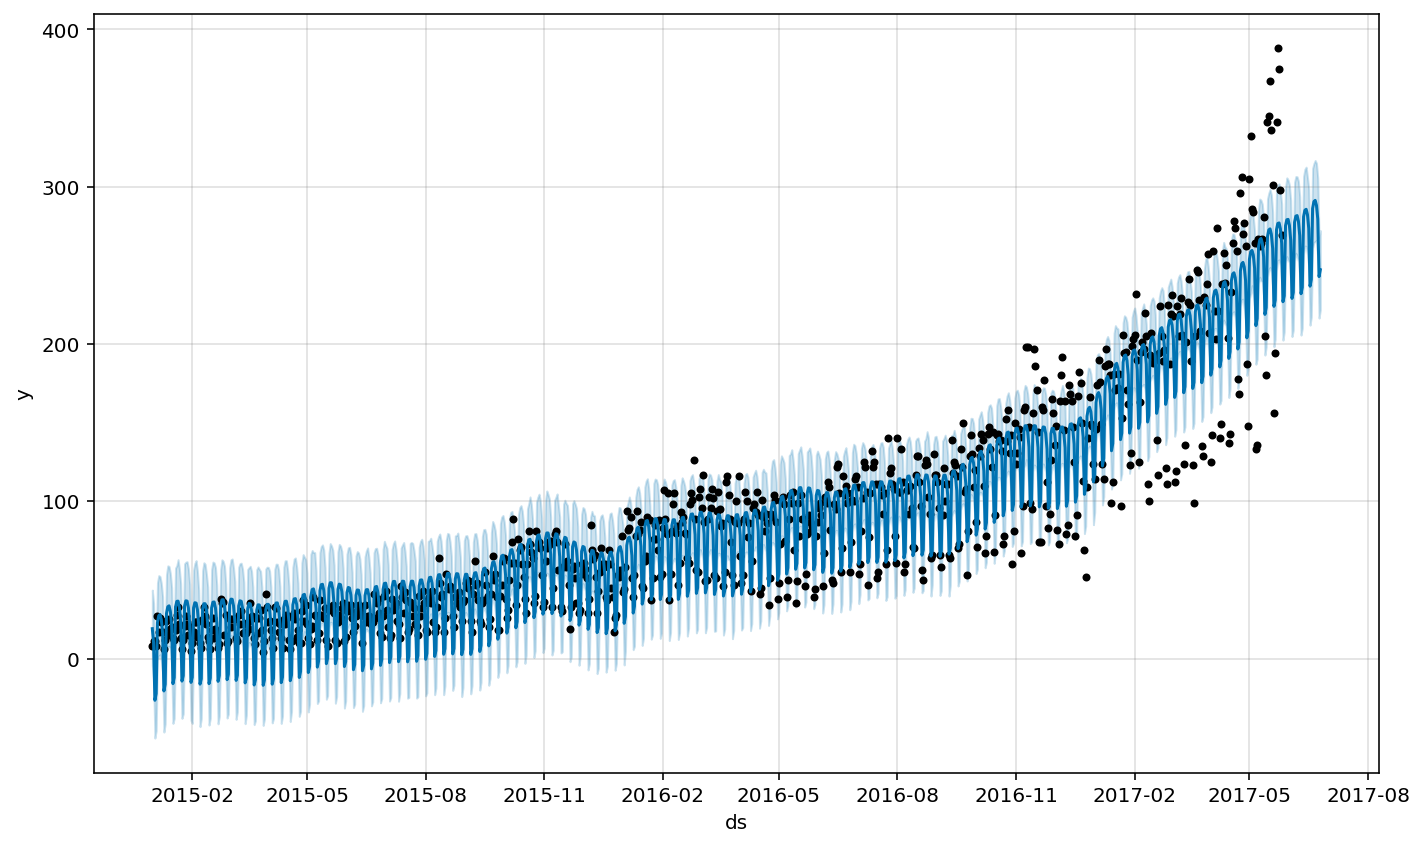

In [24]:
m.plot(forecast);

Gambar diatas sepertinya tidak memberikan kita banyak informasi. Sepertinya model nya menganggap banyak data outliers, yang keluar dari range/confidence interval dari prediksi. 

Function `Prophet.plot_components` mungkin lebih berguna di case ini. Kita bisa lihat trend secara umum,trend pekanan, dan trend tahunan 

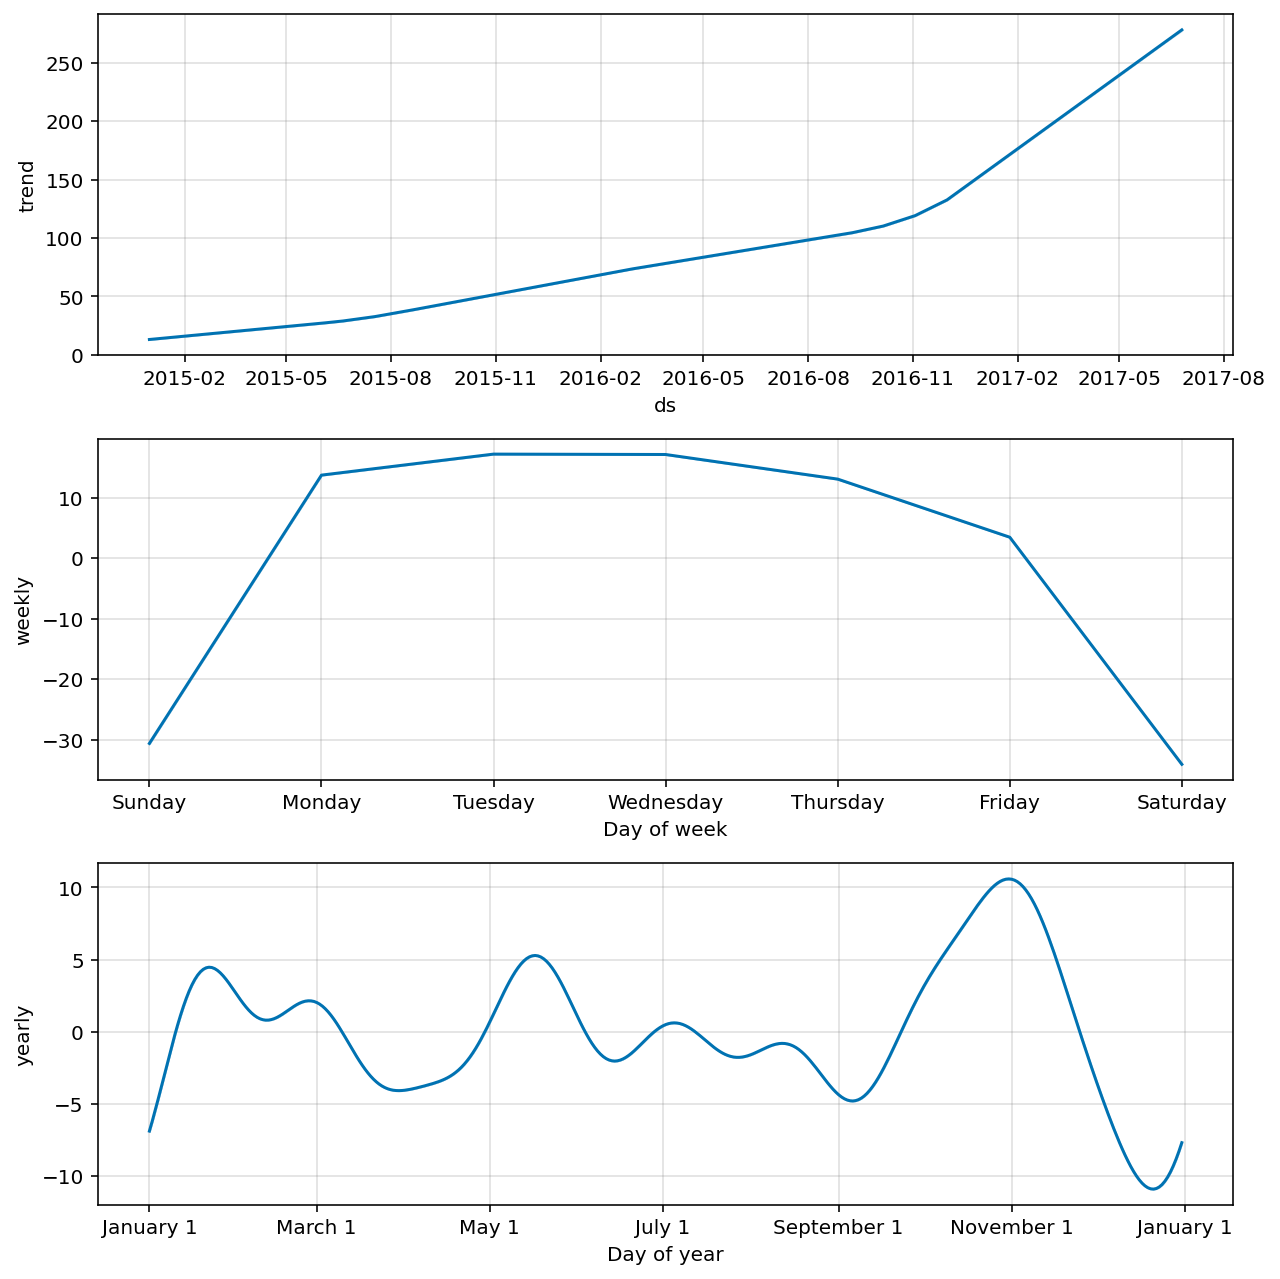

In [25]:
m.plot_components(forecast);

Kalau kita amati ternyata FB prophet bagus juga fitting modelnya, jumlah post di Medium naik banget diakhir tahun 2016. Kemudian weekend cenderung sedkit post, dan public holiday juga cenderung sedikit post, chrismast dan new year

### Mengevaluasi prediksi

In [26]:
print(', '.join(forecast.columns))

ds, trend, yhat_lower, yhat_upper, trend_lower, trend_upper, additive_terms, additive_terms_lower, additive_terms_upper, weekly, weekly_lower, weekly_upper, yearly, yearly_lower, yearly_upper, multiplicative_terms, multiplicative_terms_lower, multiplicative_terms_upper, yhat


Kita join hasil prediksi dengan data aktual bulan terakhir yang kita hapus sebelumnya

In [27]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [28]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.tail(n=3)

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2017-06-23,279.442265,254.593068,305.349314,421
2017-06-24,242.844190,216.455354,267.911734,277
2017-06-25,247.190941,221.643493,272.102089,253


Evaluasi dengan MAPE dan MAE

In [29]:
def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.
    
       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """
    
    # Make a copy
    df = df.copy()
    
    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    # Recall that we held out the values of the last `prediction_size` days
    # in order to predict them and measure the quality of the model. 
    
    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]
    
    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [30]:
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE 22.64085771181396
MAE 70.02107834666941


Prosentase error MAPE = 22.6%, dan rata-rata model yang kita buat salah kurang lebih 70 posts (MAE).

### Visualization

In [31]:
def show_forecast(cmp_df, num_predictions, num_values, title):
    """Visualize the forecast."""
    
    def create_go(name, column, num, **kwargs):
        points = cmp_df.tail(num)
        args = dict(name=name, x=points.index, y=points[column], mode='lines')
        args.update(kwargs)
        return go.Scatter(**args)
    
    lower_bound = create_go('Lower Bound', 'yhat_lower', num_predictions,
                            line=dict(width=0),
                            marker=dict(color="gray"))
    upper_bound = create_go('Upper Bound', 'yhat_upper', num_predictions,
                            line=dict(width=0),
                            marker=dict(color="gray"),
                            fillcolor='rgba(68, 68, 68, 0.3)', 
                            fill='tonexty')
    forecast = create_go('Forecast', 'yhat', num_predictions,
                         line=dict(color='rgb(31, 119, 180)'))
    actual = create_go('Actual', 'y', num_values,
                       marker=dict(color="red"))
    
    # In this case the order of the series is important because of the filling
    data = [lower_bound, upper_bound, forecast, actual]

    layout = go.Layout(yaxis=dict(title='Posts'), title=title, showlegend = False)
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, show_link=False)

show_forecast(cmp_df, prediction_size, 100, 'New posts on Medium')

Kalau dilihat dari hasil ini, merah (data aktual), biru adalah prediksi, secara mean sepertinya benar. Tetapi model kita ternyata tidak bisa menangkap peak dan dips weekly seasonality. 

Terlihat pula banyak data actual keluar dari confident interval fb prophet model. Ini mungkin karena unstable variance. Coba kita gunakan box-cox transformation.

## Box-Cox Transformation

More info: [Box–Cox transformation](http://onlinestatbook.com/2/transformations/box-cox.html)


In [32]:
def inverse_boxcox(y, lambda_):
    return np.exp(y) if lambda_ == 0 else np.exp(np.log(lambda_ * y + 1) / lambda_)

In [33]:
train_df2 = train_df.copy().set_index('ds')

In [34]:
train_df2.head()

,y
ds,
2015-01-01,8
2015-01-02,11
2015-01-03,11
2015-01-04,8
2015-01-05,27


In [35]:
train_df2['y'], lambda_prophet = stats.boxcox(train_df2['y'])
train_df2.reset_index(inplace=True)

New Prophet model

In [36]:
m2 = Prophet()
m2.fit(train_df2)
future2 = m2.make_future_dataframe(periods=prediction_size)
forecast2 = m2.predict(future2)

In [37]:
for column in ['yhat', 'yhat_lower', 'yhat_upper']:
    forecast2[column] = inverse_boxcox(forecast2[column], lambda_prophet)

Compare prediksi result setelah box-cox dengan actual data

In [38]:
cmp_df2 = make_comparison_dataframe(df, forecast2)
for err_name, err_value in calculate_forecast_errors(cmp_df2, prediction_size).items():
    print(err_name, err_value)

MAPE 12.034640875645486
MAE 40.923902597393194


Nah, kita bisa improve modelnya nih, sekarang percentage error MAPE 12%

In [39]:
show_forecast(cmp_df, prediction_size, 100, 'No transformations')
show_forecast(cmp_df2, prediction_size, 100, 'Box–Cox transformation')

# <center><font color="blue">Prophet airpassengers

In [5]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'fbprophet'

In [6]:
data = pd.read_csv('data/AirPassengers.csv') 

In [7]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['Month'])
df['y'] = data['#Passengers']

In [8]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
m = Prophet()
m.fit(df)

NameError: name 'Prophet' is not defined

In [ ]:
future = m.make_future_dataframe(periods=12 * 6, freq='M')
future.tail()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
fig = m.plot(forecast)
#a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
m = Prophet(n_changepoints=3).fit(df)
future = m.make_future_dataframe(periods=12 * 6, freq='M')
forecast = m.predict(future)
fig = m.plot(m.predict(future))

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
m = Prophet(changepoint_prior_scale=0.001).fit(df)
future = m.make_future_dataframe(periods=12 * 6, freq='M')
forecast = m.predict(future)
fig = m.plot(forecast)

In [ ]:
m = Prophet(changepoint_prior_scale=0.5).fit(df)
future = m.make_future_dataframe(periods=12 * 6, freq='M')
forecast = m.predict(future)
fig = m.plot(forecast)

In [ ]:
m = Prophet(changepoint_prior_scale=0.5, n_changepoints=7).fit(df)
future = m.make_future_dataframe(periods=12 * 6, freq='M')
forecast = m.predict(future)
fig = m.plot(forecast)

In [ ]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

In [ ]:
df_p = performance_metrics(df_cv)
df_p.head()

In [ ]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [ ]:
m = Prophet(changepoint_prior_scale=.001, n_changepoints=0).fit(df)
future = m.make_future_dataframe(periods=12 * 6, freq='M')
forecast = m.predict(future)
fig = m.plot(forecast)

In [ ]:
changepoint_prior_scales = [.005, .05, .5, 2]
n_changepoints = [8, 10, 15, 20, 25]

rmse = []
for changepoint_prior_scale in changepoint_prior_scales:
    for n_changepoint in n_changepoints:
        print('Changepoint Prior Scale:', changepoint_prior_scale)
        print('Number Changepoints:', n_changepoint)
        m = Prophet(changepoint_prior_scale=changepoint_prior_scale, n_changepoints=n_changepoint).fit(df)
        future = m.make_future_dataframe(periods=12 * 6, freq='M')
        forecast = m.predict(future)
        fig = m.plot(forecast)
        a = add_changepoints_to_plot(fig.gca(), m, forecast)
        plt.show()
        df_cv = cross_validation(m, initial='1095 days', period='180 days', horizon = '365 days')
        df_p = performance_metrics(df_cv)
        rmse.append((df_p['rmse'].mean(), {'changepoint_prior_scale': changepoint_prior_scale, 'n_changepoint': n_changepoint}))
        fig = plot_cross_validation_metric(df_cv, metric='mape')
        plt.show()

In [ ]:
rmse

In [ ]:
#dataframe of annual US Public Holidays over training and forecasting periods 

ny = pd.DataFrame({'holiday': "New Year's Day", 'ds' : pd.to_datetime(['2016-01-01', '2017-01-01'])})  
mlk = pd.DataFrame({'holiday': 'Birthday of Martin Luther King, Jr.', 'ds' : pd.to_datetime(['2016-01-18', '2017-01-16'])}) 
wash = pd.DataFrame({'holiday': "Washington's Birthday", 'ds' : pd.to_datetime(['2016-02-15', '2017-02-20'])})
mem = pd.DataFrame({'holiday': 'Memorial Day', 'ds' : pd.to_datetime(['2016-05-30', '2017-05-29'])})
ind = pd.DataFrame({'holiday': 'Independence Day', 'ds' : pd.to_datetime(['2015-07-04', '2016-07-04', '2017-07-04'])})
lab = pd.DataFrame({'holiday': 'Labor Day', 'ds' : pd.to_datetime(['2015-09-07', '2016-09-05', '2017-09-04'])})
col = pd.DataFrame({'holiday': 'Columbus Day', 'ds' : pd.to_datetime(['2015-10-12', '2016-10-10', '2017-10-09'])})
vet = pd.DataFrame({'holiday': "Veteran's Day", 'ds' : pd.to_datetime(['2015-11-11', '2016-11-11', '2017-11-11'])})
thanks = pd.DataFrame({'holiday': 'Thanksgiving Day', 'ds' : pd.to_datetime(['2015-11-26', '2016-11-24'])})
christ = pd.DataFrame({'holiday': 'Christmas', 'ds' : pd.to_datetime(['2015-12-25', '2016-12-25'])})

holidays = pd.concat([ny, mlk, wash, mem, ind, lab, col, vet, thanks, christ])

In [ ]:
prophet = Prophet(growth='linear',
                  yearly_seasonality=True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
#                   holidays=holidays,
                  seasonality_mode='multiplicative',
                  seasonality_prior_scale=10,
                  holidays_prior_scale=10,
                  changepoint_prior_scale=.05,
                  mcmc_samples=0
                  ).add_seasonality(name='quarterly',
                                    period=365.25 / 4,fourier_order=15
                  )
prophet.fit(df)
future = prophet.make_future_dataframe(periods=12 * 6, freq='M')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
df_cv = cross_validation(prophet, initial='1095 days', period='180 days', horizon = '365 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()